In [2]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

from patsy import dmatrices

import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats

# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [3]:
# Carregando a base de gorjetas
tips = sns.load_dataset("tips")

#Criando a variável tip_pct - % da Gorjeta em Relação ao Valor Líquido da Conta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Criando a variável net_bill - Valor Líquido da Conta
tips['net_bill'] = tips['total_bill'] - tips['tip']


In [4]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct',
       'net_bill'],
      dtype='object')

In [5]:
# 1. 

# Criando a matriz de design (matriz X) e a matriz y usando o Patsy
y, X = dmatrices('tip ~ sex + smoker + net_bill', data=tips, return_type='dataframe')

In [6]:
# 2.

# Ajustando o modelo de Regressão
model = sm.OLS(y, X).fit()

# Verificando Sumário do Modelo para Analisar a Significancia Estatística das Variáveis
print(model.summary())

y, X = dmatrices('tip ~ net_bill', data=tips, return_type='dataframe')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.28
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           4.03e-21
Time:                        17:05:08   Log-Likelihood:                -375.19
No. Observations:                 244   AIC:                             758.4
Df Residuals:                     240   BIC:                             772.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2386      0.215      5.768

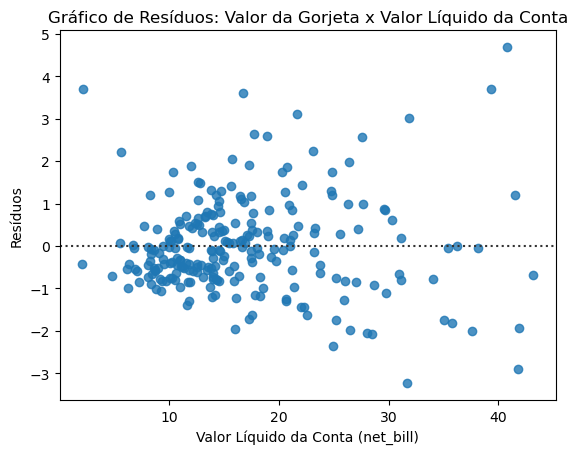

In [7]:
# 3.
# Gráfico de Resíduos em Função de net_bill
sns.residplot(x='net_bill', y=model.resid, data=tips)
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos: Valor da Gorjeta x Valor Líquido da Conta')
plt.show()

In [8]:
# 4.

# Transformando net_bill no log
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustando o Modelo de Regressão com net_bill Transformado no log
y_log, X_log = dmatrices('tip ~ log_net_bill', data=tips, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()

# Transformando net_bill em um Polinômio de 2º
tips['net_bill_squared'] = np.square(tips['net_bill'])

# Ajustando Modelo de Regressão com net_bill Transformado em um Polinômio
y_poly, X_poly = dmatrices('tip ~ net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()

# Comparação
print("MODELO ORIGINAL:")
print(model.summary())
print("\nMODELO COM LOG (net_bill):")
print(model_log.summary())
print("\nMODELO COM net_bill e net_bill²")
print(model_poly.summary())
                

MODELO ORIGINAL:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.28
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           4.03e-21
Time:                        17:05:14   Log-Likelihood:                -375.19
No. Observations:                 244   AIC:                             758.4
Df Residuals:                     240   BIC:                             772.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2386     

* Ambos os modelos ficaram com R² abaixo do modelo original, mas o mais próximo foi o modelo com Polinômio.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
# 1)

# Verificando quais variáveis existem no DataFrame
available_columns = tips.columns

# Verificando se as variáveis explicativas estão presentes no DataFrame
variables = ['sex', 'smoker', 'diner', 'net_bill']
variables_to_include = [var for var in variables if var in available_columns]

# Criando a fórmula para a matriz de design
formula = 'log_tip ~ ' + ' + '.join(variables_to_include)

# Transformando tip no log
tips['log_tip'] = np.log(tips['tip'])

# Criando a matriz de design (matriz X) e a matriz y para o modelo no log de tip
y_log, X_log = dmatrices(formula, data=tips, return_type='dataframe')

# Ajustando o Modelo de Regressão com o log de tip
model_log_tip = sm.OLS(y_log, X_log).fit()

# Exibindo o resumo do modelo
print(model_log_tip.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     36.43
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.95e-19
Time:                        17:06:50   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             203.0
Df Residuals:                     240   BIC:                             217.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4631      0.069      6.730

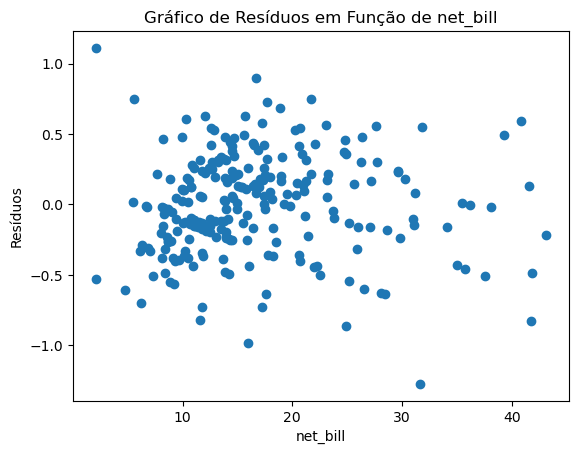

In [17]:
#3) 

# Selecionar apenas as variáveis explicativas existentes no dataset
variables = ['tip', 'sex', 'smoker', 'diner', 'net_bill']
variables_exist = [var for var in variables if var in tips.columns]

# Ajustando o modelo com as variáveis explicativas existentes no log
formula = 'np.log(tip) ~ ' + ' + '.join(variables_exist[1:])
y_log, X_log = dmatrices(formula, data=tips, return_type='dataframe')
model_log_tip = sm.OLS(y_log, X_log).fit()

# Obtendo os resíduos do modelo ajustado
residuos = model_log_tip.resid

# Plotando o gráfico de resíduos em função de net_bill (se a variável existir)
if 'net_bill' in variables_exist:
    plt.scatter(tips['net_bill'], residuos)
    plt.xlabel('net_bill')
    plt.ylabel('Resíduos')
    plt.title('Gráfico de Resíduos em Função de net_bill')
    plt.show()
else:
    print("A variável 'net_bill' não existe no dataset.")



**Resposta do item 4):**

* O Modelo Polinomial apresenta um R² de 0.334 sendo assim a melhor escolha dentre as disponíveis.

MODELO COM LOG (net_bill):
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           4.40e-20
Time:                        17:18:44   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.25

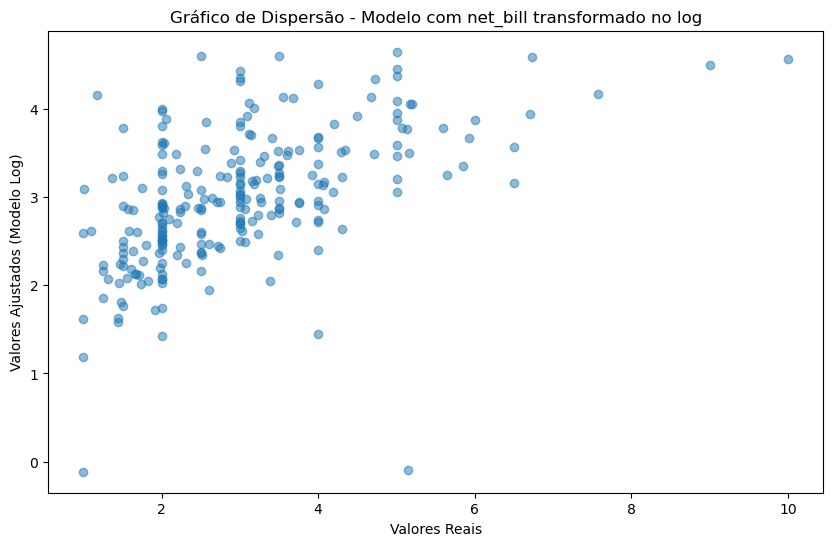

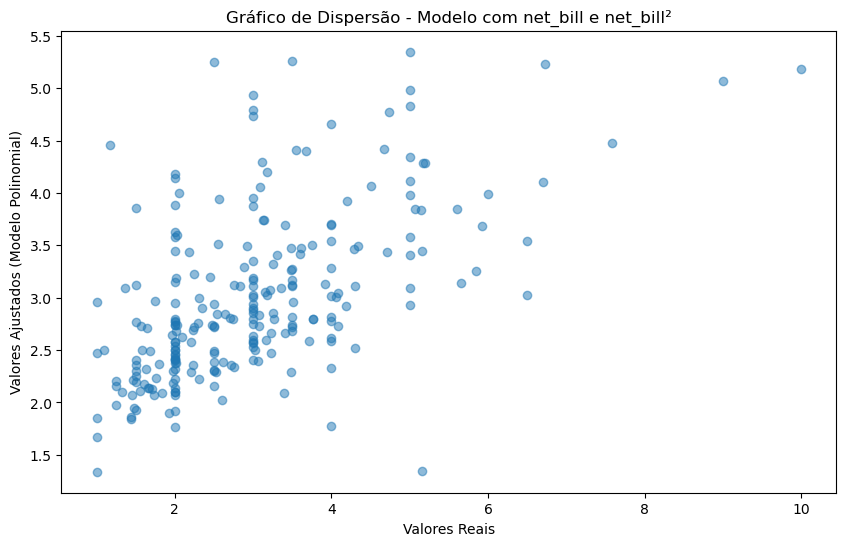

In [19]:
# 4) 

# Modelo com net_bill transformado no log
tips['log_net_bill'] = np.log(tips['net_bill'])
y_log, X_log = dmatrices('tip ~ log_net_bill', data=tips, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()

# Modelo com net_bill transformado em um Polinômio de 2º grau
tips['net_bill_squared'] = np.square(tips['net_bill'])
y_poly, X_poly = dmatrices('tip ~ net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()

# Comparação dos modelos
print("MODELO COM LOG (net_bill):")
print(model_log.summary())
print("\nMODELO COM net_bill e net_bill²")
print(model_poly.summary())

# Gráfico de dispersão dos valores reais vs. valores ajustados do modelo log
plt.figure(figsize=(10, 6))
plt.scatter(y_log, model_log.fittedvalues, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Ajustados (Modelo Log)")
plt.title("Gráfico de Dispersão - Modelo com net_bill transformado no log")
plt.show()

# Gráfico de dispersão dos valores reais vs. valores ajustados do modelo polinomial
plt.figure(figsize=(10, 6))
plt.scatter(y_poly, model_poly.fittedvalues, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Ajustados (Modelo Polinomial)")
plt.title("Gráfico de Dispersão - Modelo com net_bill e net_bill²")
plt.show()

In [20]:
# 5)

# Modelo do item 1 - net_bill transformado no log
tips['log_net_bill'] = np.log(tips['net_bill'])
y_log, X_log = dmatrices('tip ~ log_net_bill', data=tips, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()

# Modelo do item 2 - net_bill e net_bill²
tips['net_bill_squared'] = np.square(tips['net_bill'])
y_poly, X_poly = dmatrices('tip ~ net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()

# R² na escala original (sem log) - Modelo do item 1
R_squared_log = model_log.rsquared
print("R² na escala original (Modelo do item 1):", R_squared_log)

# R² na escala original (sem log) - Modelo do item 2
R_squared_poly = model_poly.rsquared
print("R² na escala original (Modelo do item 2):", R_squared_poly)

R² na escala original (Modelo do item 1): 0.2944412513792952
R² na escala original (Modelo do item 2): 0.3344216007656947


**Resposta:**
* O modelo do item 2 tem o melhor coeficiente de determinação.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [50]:
df = pd.read_csv('previsao_de_renda.csv')

# Verificar os primeiros registros
df.head()


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


**1.**

In [61]:
X = df[['tempo_emprego']]
y = df['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Intercept:', model.intercept_)
print('Coeficiente:', model.coef_[0])


Intercept: 2490.608334340075
Coeficiente: 286.03698519334876


**2.**

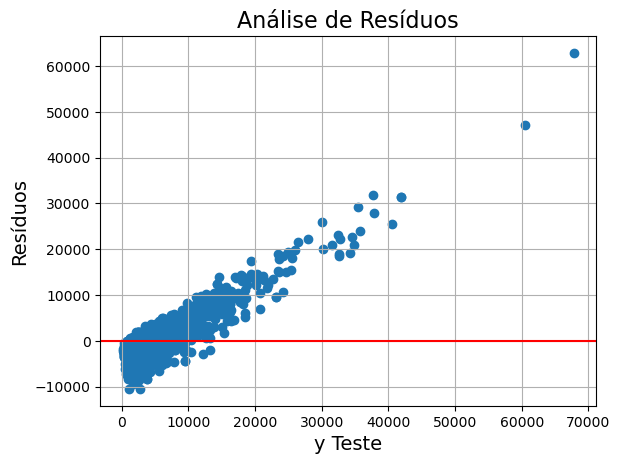

In [74]:
residuos = y_test - y_pred

plt.scatter(y_test, residuos)
plt.axhline(y=0, color='r', linestyle='-')  # linha horizontal em y=0
plt.xlabel('y Teste', fontsize=14)  # aumentando o tamanho do texto do eixo x
plt.ylabel('Resíduos', fontsize=14)  # aumentando o tamanho do texto do eixo y
plt.title('Análise de Resíduos', fontsize=16)  # aumentando o tamanho do título
plt.grid(True)  # adicionando grid
plt.show()



**Resposta:**
* Removendo as variáveis insignificantes, verificar se o modelo esta sofrendo de overfitting e fazer uma regularização.

**3.**

In [63]:
# Substitua 'coluna_booleana' pelo nome real da sua coluna
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(int)
df['posse_de_imovel'] = df['posse_de_imovel'].astype(int)
df['mau'] = df['mau'].astype(int)

# Codificação one-hot para as variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('renda', axis=1)
y = df_encoded['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


**4.**

In [75]:
# Lista de variáveis insignificantes
insignificant_vars = ['const', 'Unnamed: 0', 'index', 'posse_de_veiculo', 'qtd_filhos', 'qt_pessoas_residencia',
                      'mau', 'data_ref_2015-02-01', 'data_ref_2015-03-01', 'data_ref_2015-04-01', 
                      'data_ref_2015-05-01', 'data_ref_2015-06-01', 'data_ref_2015-07-01', 'data_ref_2015-08-01', 
                      'data_ref_2015-09-01', 'data_ref_2015-10-01', 'data_ref_2015-11-01', 'data_ref_2015-12-01', 
                      'data_ref_2016-01-01', 'data_ref_2016-02-01', 'data_ref_2016-03-01', 'tipo_renda_Bolsista',
                      'educacao_Secundário', 'educacao_Superior incompleto', 'estado_civil_Separado', 
                      'estado_civil_Solteiro', 'estado_civil_União', 'estado_civil_Viúvo', 'tipo_residencia_Casa']

# Removendo apenas as variáveis que estão presentes no dataframe
insignificant_vars = [var for var in insignificant_vars if var in X_train.columns]

# Removendo as variáveis insignificantes dos conjuntos de treino e teste
X_train = X_train.drop(insignificant_vars, axis=1)
X_test = X_test.drop(insignificant_vars, axis=1)

# Ajustando o modelo novamente
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Treinar o modelo de regressão
model = sm.OLS(y_train, X_train)
results = model.fit()

# Imprimir os coeficientes
print(results.params)

posse_de_imovel                   380.148618
idade                              24.734518
tempo_emprego                     295.327106
sexo_M                           2280.957359
tipo_renda_Empresário             977.551008
tipo_renda_Pensionista           -390.293535
tipo_renda_Servidor público       564.381158
educacao_Pós graduação           3058.454776
educacao_Superior completo        529.347731
tipo_residencia_Com os pais      -289.644256
tipo_residencia_Comunitário      -644.340439
tipo_residencia_Estúdio          -799.089904
tipo_residencia_Governamental    -483.864363
dtype: float64


**Interpretando alguns parâmetors:**

* posse_de_imovel: Para cada cliente que possui um imóvel, a variável dependente aumenta em média 380,15 unidades, desde que todas as outras variáveis sejam mantidas constantes, o que pode segurir que possuir um imóvel pode ter um impacto positivo na pontuação de crédito ou na avaliação de risco de crédito.
* idade: para cada aumento de um ano na idade do cliente, a variável dependente aumenta em média 24,73 unidades, sugerindo que a idade do cliente pode ter uma influência positiva na pontuação de crédito.
* tempo_emprego: Para cada aumento de uma unidade no tempo que o cliente está no emprego atual, a variável dependente aumenta em média 295,33 unidades, o que pode sugerir que o tempo de emprego atual pode ter uma influência positiva na pontuação de crédito.

**5.**

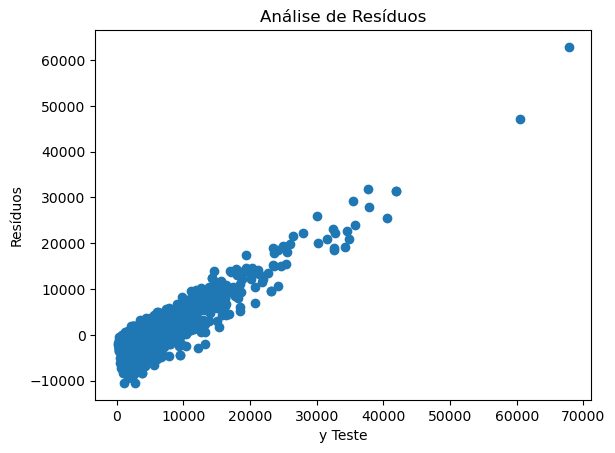

In [71]:
residuos = y_test - y_pred

plt.scatter(y_test, residuos)
plt.xlabel('y Teste')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()


**Resposta:**

* Há indícios de heterocedasticidade, ou seja, a variação dos resídulos não é constante em todos os níveis da variável independente, em outras palavras o modelo é menos preciso ao prever valores maiores de y, concluindo que o mesmo pode não ser a melhor representação dos dados, talvez sendo necessário um modelo mais complexo.